# Visualization of data and model performance

## Error bars
- Use std. deviation to indicate uncertainty
- Error bar = std.dev values
- Use pandas to "filter" data on criteria (environment)
- Then for that environment - plot line plot with error bar -
- For a single column say A2C Precision

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Utility functions

In [2]:
# Write heading to summary performance file
def write_heading(heading, report_file):
    from csv import writer
    with open(report_file, 'a', newline='') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(heading)
        f_object.close()

# Write summary performance to file
def write_perf_metrics(heading, metrics, report_file, round_decimals=8):
    from pathlib import Path
    
    write_heading([''], report_file)  
    write_heading(heading, report_file)   
    report_file = Path(report_file)
    report_file.parent.mkdir(parents=True, exist_ok=True)
    metrics = metrics.round(round_decimals)
    metrics.to_csv(report_file, mode='a')
    
    write_heading(['-----------------------------------------------------------------------'], report_file)  

In [3]:
# Draw error bar plots across all training rounds
def error_plot(fig, ax, x, y, y_err, title, y_label, x_label, legend):
    TIME_STEP_TICK = 1
    X_LOW = -0.25
    X_UPPER = len(x)
    Y_LOW = 0.0
    Y_UPPER = 1.1
    Y_GRID = 0.25

    ax.errorbar(x, y, yerr=y_err, fmt='-o', alpha=0.5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title, fontsize=12)
    ax.set(ylim=[Y_LOW, Y_UPPER])
    ax.set_xticks(np.arange(0, X_UPPER, TIME_STEP_TICK))
    ax.set_xticklabels(x[::TIME_STEP_TICK], fontdict={'fontsize':10})
    
    ax.grid(alpha=0.25)
    ax.spines["top"].set_alpha(0)
    ax.spines["bottom"].set_alpha(.3)
    ax.spines["right"].set_alpha(0)
    ax.spines["left"].set_alpha(.3)
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(legend, loc='center left', bbox_to_anchor=(1, 0.8))
    pdf_file = title.replace('-', '')
    pdf_file = pdf_file.replace(' ', '_')
    fig.savefig(f'{pdf_file}.pdf', bbox_inches='tight')

In [4]:
# Draw multi-line plots for all algorithms
def multi_algorithm_plot(env_subset, env_label):
    # Create a figure with 1 row and 3 cols of subplots
    PLOT_H = 3
    PLOT_W = 20

    # define the standard algorithms and labels
    metric_key = ['Pr', 'Rc', 'F1', 'F05']
    algo_keys = ['REINFORCE', 'A2C', 'DQN', 'PPO']
    algos = {'REINFORCE':'RF', 'A2C':'A2C', 'DQN':'DQN', 'PPO':'PPO'}
    metrics = {'Pr':'Precision', 'Rc':'Recall', 'F1':'F-1 score', 'F05':'F-beta 0.5'}

    # X axis is fixed
    x_label = 'Training round'
    legend = algo_keys
    
    metrics_df = []
    
    for m in range(len(metric_key)):
        # Multi-line plots
        fig, ax = plt.subplots()

        fig.set_figheight(PLOT_H)
        fig.set_figwidth(PLOT_W)

        # axes = [ax1, ax2, ax3, ax4]
        for n in range(len(algo_keys)):
            m_key = metric_key[m]
            key = algos[algo_keys[n]] 
            mr_key = f'{key}_{m_key}'
            mr_sd_key = f'{key}_{m_key}_sd'
            mr = env_subset.groupby(['Round']).agg({mr_key :['mean']})
            mr_sd = env_subset.groupby(['Round']).agg({mr_sd_key :['mean']})

            y = mr.to_numpy().flatten().tolist()
            y_err = mr_sd.to_numpy().flatten().tolist()        
            y_label = metrics[m_key]
            title = f'{env_label} - {y_label}'

            x = [i for i in range(len(y))]
            error_plot(fig, ax, x, y, y_err, title, y_label, x_label, legend)            


In [5]:
def compute_aggregated_metrics(df):
    metrics = df.groupby(['environment_info']).agg(
        {'RF_Pr': ['mean'], 'RF_Rc': ['mean'],'RF_F1': ['mean'], 'RF_F05': ['mean'],
         'A2C_Pr': ['mean'], 'A2C_Rc': ['mean'],'A2C_F1': ['mean'], 'A2C_F05': ['mean'],
         'DQN_Pr': ['mean'], 'DQN_Rc': ['mean'],'DQN_F1': ['mean'], 'DQN_F05': ['mean'],
         'PPO_Pr': ['mean'], 'PPO_Rc': ['mean'],'PPO_F1': ['mean'], 'PPO_F05': ['mean'],

         'RF_Pr_sd': ['mean'], 'RF_Rc_sd': ['mean'],'RF_F1_sd': ['mean'], 'RF_F05_sd': ['mean'],
         'A2C_Pr_sd': ['mean'], 'A2C_Rc_sd': ['mean'],'A2C_F1_sd': ['mean'], 'A2C_F05_sd': ['mean'],
         'DQN_Pr_sd': ['mean'], 'DQN_Rc_sd': ['mean'],'DQN_F1_sd': ['mean'], 'DQN_F05_sd': ['mean'],
         'PPO_Pr_sd': ['mean'], 'PPO_Rc_sd': ['mean'],'PPO_F1_sd': ['mean'], 'PPO_F05_sd': ['mean']

        })
    return(metrics)

# Concat experiment files

In [6]:
import glob
PATH = './results/Experiment_Reports/'
EXPT_REPORTS = f'{PATH}/Experiment_Results_?_MS_R?.csv'
CONCAT_REPORT = f'{PATH}/Concat_Experiments_MS.csv'
CONSOLIDATED_PERFORMANCE_REPORT = f'{PATH}/Consolidated_Summary_MS.csv'

report_files = glob.glob(EXPT_REPORTS)

In [9]:
print(len(report_files))
report_files

10


['./results/Experiment_Reports\\Experiment_Results_0_MS_R2.csv',
 './results/Experiment_Reports\\Experiment_Results_0_MS_R3.csv',
 './results/Experiment_Reports\\Experiment_Results_1_MS_R2.csv',
 './results/Experiment_Reports\\Experiment_Results_1_MS_R3.csv',
 './results/Experiment_Reports\\Experiment_Results_2_MS_R2.csv',
 './results/Experiment_Reports\\Experiment_Results_2_MS_R3.csv',
 './results/Experiment_Reports\\Experiment_Results_3_MS_R2.csv',
 './results/Experiment_Reports\\Experiment_Results_3_MS_R3.csv',
 './results/Experiment_Reports\\Experiment_Results_4_MS_R2.csv',
 './results/Experiment_Reports\\Experiment_Results_4_MS_R3.csv']

### Based on Round column added

In [10]:
# Reset Round columns
dfes = []
r = 0
for f in report_files:
    dfe = pd.read_csv(f, header = 0)
    dfe['Round'] = r
    dfes.append(dfe)
    r += 1
df_report = pd.concat(dfes)
df_report.to_csv(CONCAT_REPORT)


# ROUND_COL = False

# if ROUND_COL:
#     df_report = pd.concat((pd.read_csv(f, header = 0) for f in report_files))
#     df_report.to_csv(CONCAT_REPORT)
# else:
#     dfes = []
#     r = 0
#     for f in report_files:
#         dfe = pd.read_csv(f, header = 0)
#         dfe['Round'] = r
#         dfes.append(dfe)
#         r += 1
#     df_report = pd.concat(dfes)
#     df_report.to_csv(CONCAT_REPORT)

In [11]:
algo_metrics = compute_aggregated_metrics(df_report)
algo_metrics.to_csv(CONSOLIDATED_PERFORMANCE_REPORT)
print(f'* Done. {len(report_files)} Experiment files summarized and environment level metrics computed')

* Done. 10 Experiment files summarized and environment level metrics computed


In [12]:
# Import Data
df = pd.read_csv(CONCAT_REPORT)
# df = pd.read_csv('R1-Concat_Experiments.csv')
print('Experiments data imported. Number of records: ', len(df.index),'\n')

# Find unique environments
envs = df.environment_info.unique()
n_envs = len(envs)
print(f'Unique environments: {n_envs}\n {envs}')

Experiments data imported. Number of records:  30 

Unique environments: 3
 ['PHM C01 MS NBD' 'PHM C04 MS NBD' 'PHM C06 MS NBD']


In [24]:
# all_envs = df

# simulated_env = df[(df['environment_info'] == envs[0]) |  (df['environment_info'] == envs[1]) | (df['environment_info'] == envs[2])]

# ss_env = df[(df['environment_info'] == envs[3]) |  (df['environment_info'] == envs[4]) | (df['environment_info'] == envs[5]) |
#             (df['environment_info'] == envs[6]) |  (df['environment_info'] == envs[7]) | (df['environment_info'] == envs[8]) |
#             (df['environment_info'] == envs[9]) |  (df['environment_info'] == envs[10]) | (df['environment_info'] == envs[11])]

ms_env = df[(df['environment_info'] == envs[0]) |  (df['environment_info'] == envs[1]) | (df['environment_info'] == envs[2])]

# print(f'Total Simple-State:  Simulated: {len(simulated_env)} SS: {len(ss_env)}')
# # print(f'Total Multi-variate: MS: {len(ms_env)}')
# print(f'Per variant: Simulated: {len(simulated_env)/3} SS: {len(ss_env)/9}')

## Overall

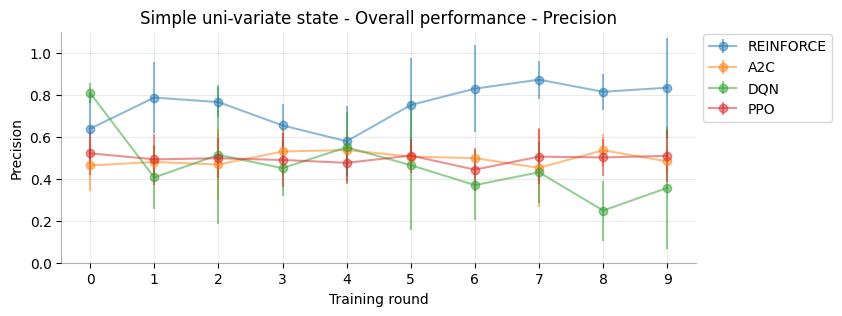

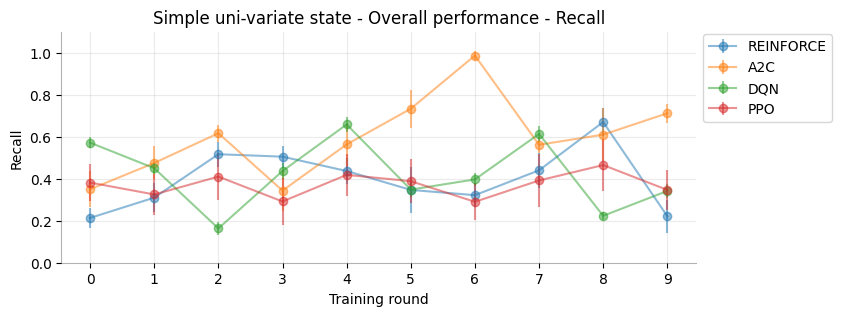

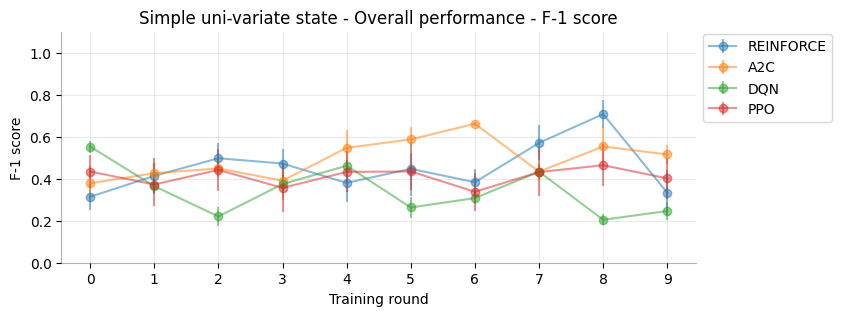

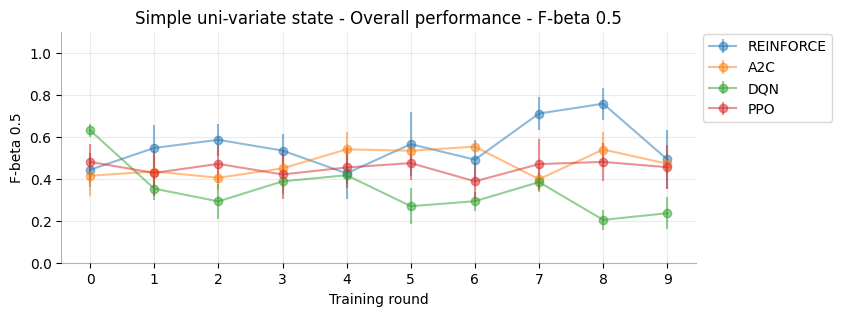

In [14]:
subset = df
env_label = 'Simple uni-variate state - Overall performance'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

### Simulation Environment Dasic 2006

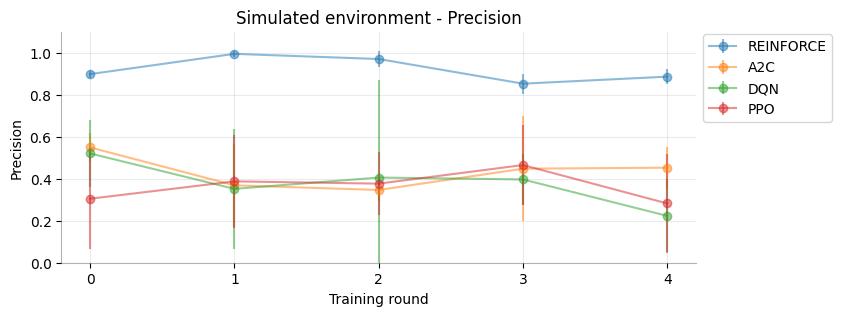

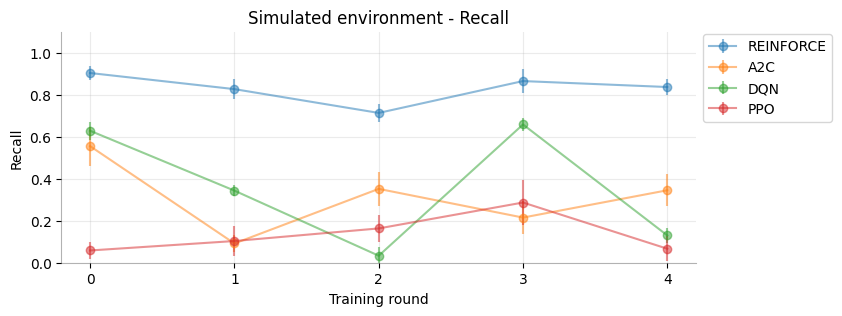

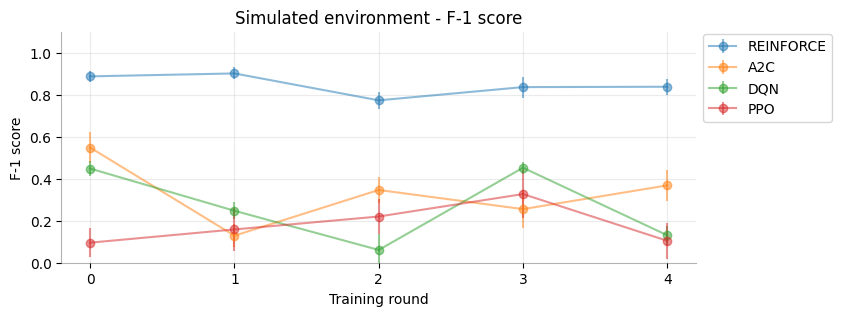

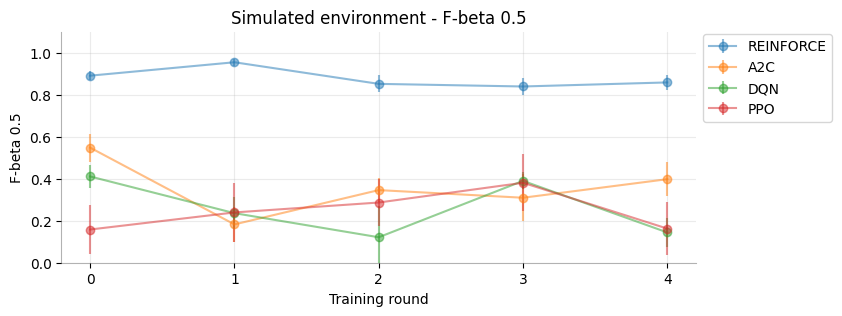

In [39]:
subset = simulated_env
env_label = 'Simulated environment'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

### Singe state simple env

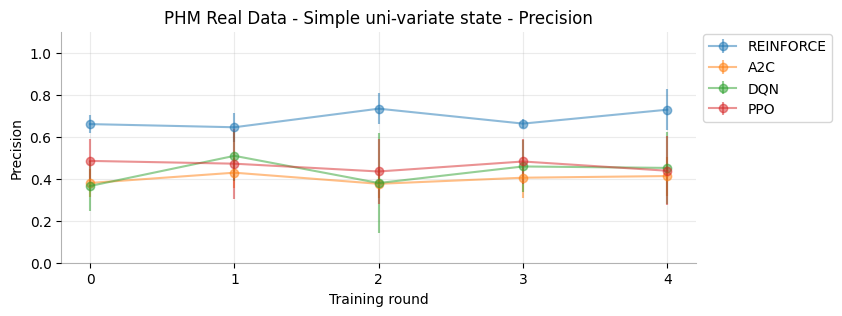

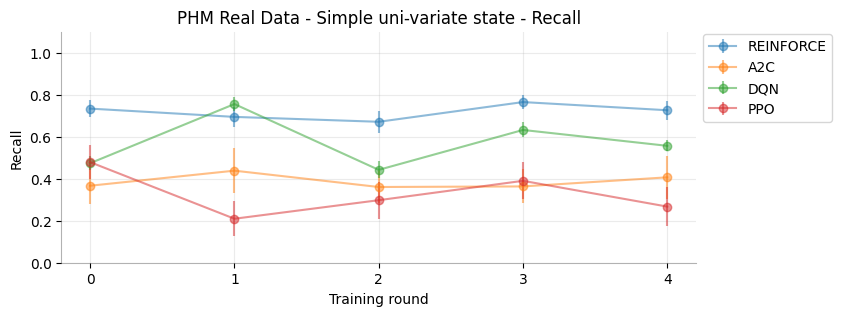

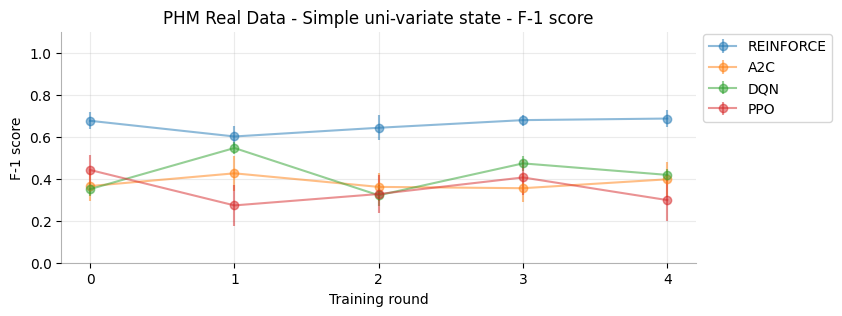

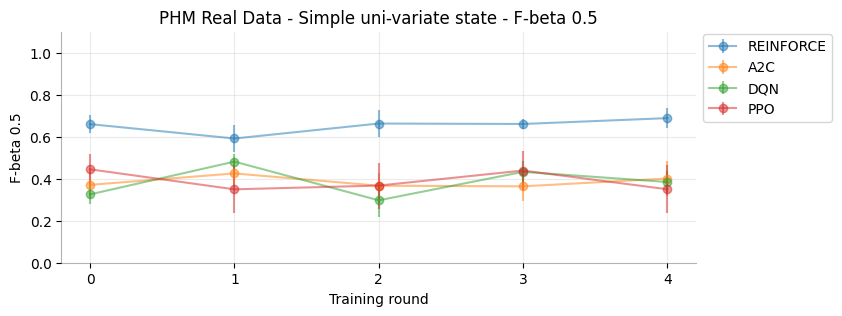

In [41]:
subset = ss_env
env_label = 'PHM Real Data - Simple uni-variate state'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

### Multi-variate state

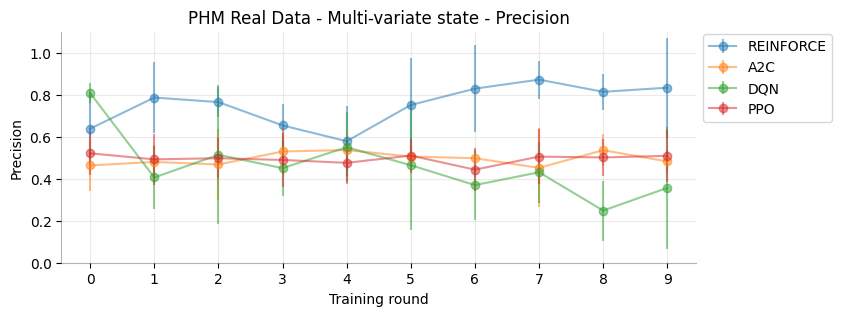

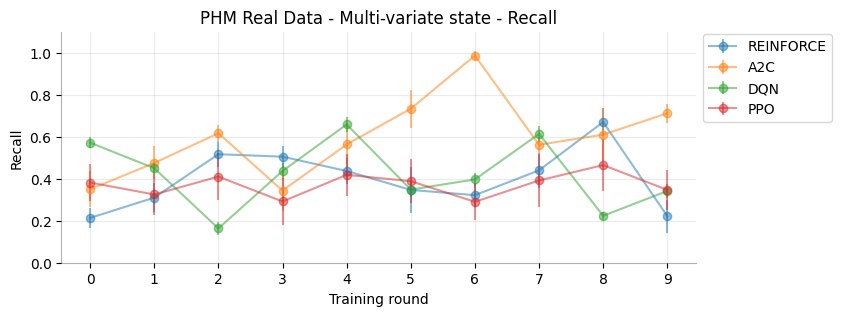

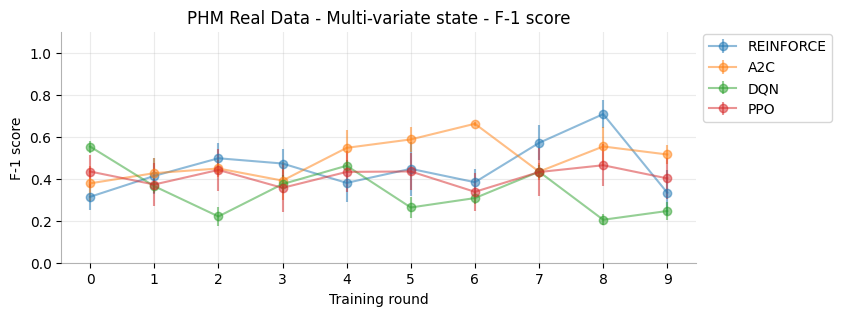

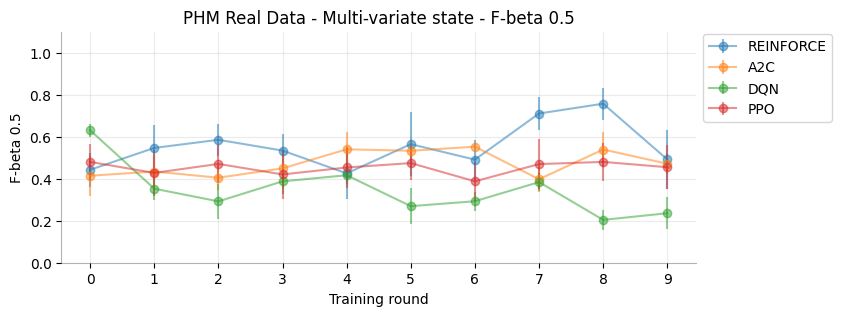

In [25]:
subset = ms_env
env_label = 'PHM Real Data - Multi-variate state'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

## Compute environment specific performance metrics

In [26]:
def compute_performance_df(env_subset):
    # Standard keys and labels
    metric_key = ['Pr', 'Rc', 'F1', 'F05']
    algo_keys = ['REINFORCE', 'A2C', 'DQN', 'PPO']
    algos = {'REINFORCE':'RF', 'A2C':'A2C', 'DQN':'DQN', 'PPO':'PPO'}
    metrics = {'Pr':'Precision', 'Rc':'Recall', 'F1':'F-1 score', 'F05':'F-beta 0.5'}

    # Performance columns
    metric_cols = ['Pr_mean', 'Pr_sd', 'Rc_mean', 'Rc_sd', 'F1_mean', 'F1_sd', 'F05_mean', 'F05_sd']

    # Initiatlize an empty pandas data fram to hold performance mentrics
    performance_df = pd.DataFrame(np.zeros((4, 8)), index=algo_keys)
    performance_df.columns = metric_cols

    # Compute metrics and fill df
    for n in range(len(algo_keys)): 

        for m in range(len(metric_key)):
            m_key = metric_key[m]
            algo_key = algos[algo_keys[n]] 
            algo_label = algo_keys[n]
            mr_key = f'{algo_key}_{m_key}'
            mr_sd_key = f'{algo_key}_{m_key}_sd'

            mr = env_subset.groupby(['Round']).agg({mr_key :['mean']})
            mr_sd = env_subset.groupby(['Round']).agg({mr_sd_key :['mean']})

            mr_mean = np.mean(mr.to_numpy().flatten())
            mr_stddev = np.mean(mr_sd.to_numpy().flatten())

            mean_col = f'{m_key}_mean' 
            sd_col = f'{m_key}_sd'

            performance_df.at[algo_label, mean_col] = mr_mean.round(4)
            performance_df.at[algo_label, sd_col] = mr_stddev.round(4)
    return (performance_df)

In [27]:
# overall_performance = compute_performance_df(all_envs)
# simulated_performance = compute_performance_df(simulated_env)
# phm_ss_performance = compute_performance_df(ss_env)
phm_ms_performance = compute_performance_df(ms_env)

In [44]:
overall_performance

,Pr_mean,Pr_sd,Rc_mean,Rc_sd,F1_mean,F1_sd,F05_mean,F05_sd
REINFORCE,0.7446,0.0532,0.7458,0.0430,0.7046,0.0420,0.7092,0.0442
A2C,0.4085,0.0929,0.3682,0.0871,0.3680,0.0732,0.3783,0.0731
DQN,0.4195,0.1761,0.5188,0.0346,0.3834,0.0378,0.3533,0.0595
PPO,0.4375,0.1563,0.2804,0.0818,0.3072,0.0894,0.3539,0.1076


In [45]:
simulated_performance

,Pr_mean,Pr_sd,Rc_mean,Rc_sd,F1_mean,F1_sd,F05_mean,F05_sd
REINFORCE,0.9203,0.0306,0.8290,0.0433,0.8473,0.0365,0.8790,0.0314
A2C,0.4329,0.1344,0.3117,0.0740,0.3294,0.0706,0.3567,0.0793
DQN,0.3794,0.2420,0.3587,0.0363,0.2679,0.0453,0.2604,0.0774
PPO,0.3632,0.2073,0.1357,0.0691,0.1811,0.0915,0.2455,0.1263


In [46]:
phm_ss_performance

,Pr_mean,Pr_sd,Rc_mean,Rc_sd,F1_mean,F1_sd,F05_mean,F05_sd
REINFORCE,0.6860,0.0607,0.7181,0.0428,0.6570,0.0439,0.6527,0.0484
A2C,0.4004,0.0790,0.3871,0.0915,0.3808,0.0741,0.3855,0.0710
DQN,0.4328,0.1542,0.5721,0.0340,0.4219,0.0353,0.3843,0.0536
PPO,0.4622,0.1393,0.3287,0.0860,0.3492,0.0887,0.3901,0.1014


In [28]:
phm_ms_performance

,Pr_mean,Pr_sd,Rc_mean,Rc_sd,F1_mean,F1_sd,F05_mean,F05_sd
REINFORCE,0.7521,0.1520,0.3982,0.0687,0.4519,0.0830,0.5549,0.1015
A2C,0.4950,0.0936,0.5952,0.0721,0.4943,0.0624,0.4737,0.0652
DQN,0.4597,0.1884,0.4203,0.0313,0.3429,0.0354,0.3466,0.0571
PPO,0.4945,0.1073,0.3708,0.1048,0.4107,0.0981,0.4519,0.0990


In [29]:
# File name where all results will be stored
performance_file = 'Performance_Metrics_MS_02-Jul-2023.csv'

# write_perf_metrics(['Overall Performance'], overall_performance, performance_file, 4)
# write_perf_metrics(['Simulated Environment Performance'], simulated_performance, performance_file, 4)
# write_perf_metrics(['PHM Real Data - Simple uni-variate state'], phm_ss_performance, performance_file, 4)
write_perf_metrics(['PHM Multi-variate state Performance'], phm_ms_performance, performance_file, 4)

## Training times of algorithms across then entire experment

In [31]:
all_envs = ms_env

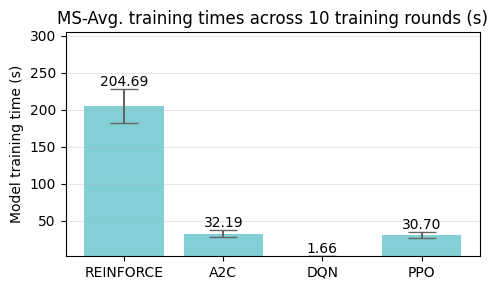

In [32]:
algo_keys = ['REINFORCE', 'A2C', 'DQN', 'PPO']
algos = {'REINFORCE':'RF', 'A2C':'A2C', 'DQN':'DQN', 'PPO':'PPO'}

RF_training_time = all_envs.agg({'RF_time':['mean','std']})
A2C_training_time = all_envs.agg({'A2C_time':['mean','std']})
DQN_training_time = all_envs.agg({'DQN_time':['mean','std']})
PPO_training_time = all_envs.agg({'PPO_time':['mean','std']})

# Create lists for the plot
x_pos = np.arange(len(algo_keys))
mean_training_time = [RF_training_time['RF_time']['mean'], A2C_training_time['A2C_time']['mean'], 
                      DQN_training_time['DQN_time']['mean'], PPO_training_time['PPO_time']['mean']]
error = [RF_training_time['RF_time']['std'], A2C_training_time['A2C_time']['std'], 
                      DQN_training_time['DQN_time']['std'], PPO_training_time['PPO_time']['std']]



# Build the plot
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(5)

max_y_lim = max(mean_training_time) + 100
min_y_lim = min(mean_training_time)
plt.ylim(min_y_lim, max_y_lim)

bars = ax.bar(x_pos, mean_training_time, yerr=error, align='center', alpha=0.5, color='#06A2AC', ecolor = '0.4', capsize=10)
ax.set_ylabel('Model training time (s)')
ax.set_xticks(x_pos)
ax.set_xticklabels(algo_keys)
ax.set_title('MS-Avg. training times across 10 training rounds (s)')
ax.yaxis.grid(True, alpha=0.30)
ax.bar_label(bars, fmt='%.2f', label_type='edge')

# Save the figure and show
plt.tight_layout()
plt.savefig('Model_training_time_MS.pdf', bbox_inches='tight')
plt.show()